# Data Cleaning Tweets

> Indented block


---

#Import library

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#mengimport library numpy dan diinisialisasikan dengan nama np, untuk pandas bernama pd

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import re,string,unicodedata
from string import punctuation
from wordcloud import WordCloud,STOPWORDS


from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

###2- Proses Load Dataset
Di proses ini dataset yang digunakan akan di definisikan pada sebuah variabel agar lebih memudahkan dalam proses pengolahan data.

In [18]:
df = pd.read_json('Tiktok.json',lines="True")
df.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/aispeke/status/14545989752...,2021-10-30 23:59:55+00:00,Tw: tiktok https://t.co/xF7jyqlzbA,Tw: tiktok twitter.com/FelizAntes/sta…,1454598975294685184,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,None,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/lucasu_san/status/14545988...,2021-10-30 23:59:32+00:00,Para wibu di tiktok tuh kepikiran buat belajar...,Para wibu di tiktok tuh kepikiran buat belajar...,1454598878435680258,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,None,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/uu_sutari13/status/1454598...,2021-10-30 23:58:51+00:00,"@didihadid_ Generasi tiktok,klo gak sawan ya s...","@didihadid_ Generasi tiktok,klo gak sawan ya s...",1454598707542851588,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,1.454598e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/diilaaja/status/1454598648...,2021-10-30 23:58:37+00:00,@txtdrorgmiskin Hah kok betah sih nahan minum?...,@txtdrorgmiskin Hah kok betah sih nahan minum?...,1454598648663134215,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.453981e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/pitaaakku/status/145459843...,2021-10-30 23:57:47+00:00,Nih gada yang jual like Instagram sama tiktok ...,Nih gada yang jual like Instagram sama tiktok ...,1454598439816343559,"{'_type': 'snscrape.modules.twitter.User', 'us...",4,0,0,...,None,NaN,None,NaN,None,None,None,None,None,None
5,snscrape.modules.twitter.Tweet,https://twitter.com/reveiluf/status/1454598409...,2021-10-30 23:57:40+00:00,"lagi nyari keperluan sosmed spt followers, lik...","lagi nyari keperluan sosmed spt followers, lik...",1454598409432698881,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,1.454384e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,None,None,"[zonauang, zonaba]",None
6,snscrape.modules.twitter.Tweet,https://twitter.com/byeoltz/status/14545983825...,2021-10-30 23:57:34+00:00,@ateezsimp2 oh tiktok 200,@ateezsimp2 oh tiktok 200,1454598382585057281,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,None,NaN,None,1.454598e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
7,snscrape.modules.twitter.Tweet,https://twitter.com/sayathaitea/status/1454598...,2021-10-30 23:57:32+00:00,@lingfungai Haris versi TIKTOK,@lingfungai Haris versi TIKTOK,1454598374900985856,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,None,NaN,None,1.454444e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
8,snscrape.modules.twitter.Tweet,https://twitter.com/sh4xoxo/status/14545983300...,2021-10-30 23:57:21+00:00,pagi2 buat tiktok da knpe? HAHAHAH,pagi2 buat tiktok da knpe? HAHAHAH,1454598330051268609,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,None,None
9,snscrape.modules.twitter.Tweet,https://twitter.com/Lic_Peloncito/status/14545...,2021-10-30 23:56:41+00:00,@Yoshi1x_ Pa tiktok,@Yoshi1x_ Pa tiktok,1454598160693727234,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.454597e+18

In [20]:
df.describe()

,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,inReplyToTweetId
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,0.0,8.548000e+03
mean,1.454073e+18,0.960000,1.896450,8.130250,0.268300,1.453801e+18,NaN,1.453752e+18
std,2.796548e+14,13.065777,60.773421,136.681277,8.341265,6.158626e+15,NaN,7.686827e+15
min,1.453655e+18,0.000000,0.000000,0.000000,0.000000,1.015299e+18,NaN,1.015299e+18
25%,1.453780e+18,0.000000,0.000000,0.000000,0.000000,1.453754e+18,NaN,1.453741e+18
50%,1.454059e+18,0.000000,0.000000,0.000000,0.000000,1.454039e+18,NaN,1.454032e+18
75%,1.454332e+18,1.000000,0.000000,0.000000,0.000000,1.454312e+18,NaN,1.454298e+18
max,1.454599e+18,1146.000000,6063.000000,10250.000000,922.000000,1.454599e+18,NaN,1.454598e+18


In [21]:
df.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/aispeke/status/14545989752...,2021-10-30 23:59:55+00:00,Tw: tiktok https://t.co/xF7jyqlzbA,Tw: tiktok twitter.com/FelizAntes/sta…,1454598975294685184,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,None,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/lucasu_san/status/14545988...,2021-10-30 23:59:32+00:00,Para wibu di tiktok tuh kepikiran buat belajar...,Para wibu di tiktok tuh kepikiran buat belajar...,1454598878435680258,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,None,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/uu_sutari13/status/1454598...,2021-10-30 23:58:51+00:00,"@didihadid_ Generasi tiktok,klo gak sawan ya s...","@didihadid_ Generasi tiktok,klo gak sawan ya s...",1454598707542851588,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,1.454598e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/diilaaja/status/1454598648...,2021-10-30 23:58:37+00:00,@txtdrorgmiskin Hah kok betah sih nahan minum?...,@txtdrorgmiskin Hah kok betah sih nahan minum?...,1454598648663134215,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.453981e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/pitaaakku/status/145459843...,2021-10-30 23:57:47+00:00,Nih gada yang jual like Instagram sama tiktok ...,Nih gada yang jual like Instagram sama tiktok ...,1454598439816343559,"{'_type': 'snscrape.modules.twitter.User', 'us...",4,0,0,...,None,NaN,None,NaN,None,None,None,None,None,None
5,snscrape.modules.twitter.Tweet,https://twitter.com/reveiluf/status/1454598409...,2021-10-30 23:57:40+00:00,"lagi nyari keperluan sosmed spt followers, lik...","lagi nyari keperluan sosmed spt followers, lik...",1454598409432698881,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,1.454384e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,None,None,"[zonauang, zonaba]",None
6,snscrape.modules.twitter.Tweet,https://twitter.com/byeoltz/status/14545983825...,2021-10-30 23:57:34+00:00,@ateezsimp2 oh tiktok 200,@ateezsimp2 oh tiktok 200,1454598382585057281,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,None,NaN,None,1.454598e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
7,snscrape.modules.twitter.Tweet,https://twitter.com/sayathaitea/status/1454598...,2021-10-30 23:57:32+00:00,@lingfungai Haris versi TIKTOK,@lingfungai Haris versi TIKTOK,1454598374900985856,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,None,NaN,None,1.454444e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
8,snscrape.modules.twitter.Tweet,https://twitter.com/sh4xoxo/status/14545983300...,2021-10-30 23:57:21+00:00,pagi2 buat tiktok da knpe? HAHAHAH,pagi2 buat tiktok da knpe? HAHAHAH,1454598330051268609,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,None,None
9,snscrape.modules.twitter.Tweet,https://twitter.com/Lic_Peloncito/status/14545...,2021-10-30 23:56:41+00:00,@Yoshi1x_ Pa tiktok,@Yoshi1x_ Pa tiktok,1454598160693727234,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.454597e+18

In [22]:
kamus_alay = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
kamus_alay = kamus_alay.rename(columns={0: 'alay', 
                                      1: 'baku'})

kamus_stopword = pd.read_csv('stopwordbahasa.csv', header=None)
kamus_stopword = kamus_stopword.rename(columns={0: 'stopword'})

emoji = pd.read_csv('Emoticon.csv', encoding="ISO-8859-1", header=None)
emoji = emoji.rename(columns={0: 'hexa',
                              1: 'arti'})

kamus_noemoji =  pd.read_csv('bytemoaja.csv', encoding='latin-1', header=None)
kamus_noemoji = kamus_noemoji.rename(columns={0: 'byte', 
                                      1: 'hapus'})

###3- Proses Casefolding
Di proses casefolding ini merupakan tahap untuk konversi text menjadi suatu bentuk yang standar. Pada tahap ini biasanya dipilih lowercase untuk membuat huruf kapital menjadi lowercase 

In [23]:
def casefolding(text):
    text = re.sub(r'@\S+', '',text)
    return text.lower()

#df['content'] = df['content'].apply(casefolding)

###4- Mengecek Missing Values ()
Adanya missing value, akan mengganggu proses pengolahan data selanjutnya. Maka dari itu perlu dilakukan pengecekan apakah terdapat data yang kosong pada salah satu field dataset.

In [24]:
df.isna().sum()

_type                   0
url                     0
date                    0
content                 0
renderedContent         0
id                      0
user                    0
replyCount              0
retweetCount            0
likeCount               0
quoteCount              0
conversationId          0
lang                    0
source                  0
sourceUrl               0
sourceLabel             0
outlinks            16997
tcooutlinks         16997
media               17461
retweetedTweet      20000
quotedTweet         18648
inReplyToTweetId    11452
inReplyToUser       11452
mentionedUsers      11833
coordinates         19785
place               19785
hashtags            18327
cashtags            19996
dtype: int64

###5- Proses Cleansing
Di proses cleansing ini merupakan proses pembersihan terhadap data yang redudan atau ganda, inkonsisten, missing value dan outlier data. Hal tersebut perlu dilakukan agar tidak mempengaruhi performa proses klasifikasi yang dilakukan.

In [25]:
df['content']

0                       tw: tiktok https://t.co/xf7jyqlzba
1        para wibu di tiktok tuh kepikiran buat belajar...
2         generasi tiktok,klo gak sawan ya stress...hah...
3         hah kok betah sih nahan minum? to the point a...
4        nih gada yang jual like instagram sama tiktok ...
                               ...                        
19995    lg main tiktok trs fyp nya korea mlu kan, ehh ...
19996    telinga yang dirawat dg baik tentu dapat menja...
19997     udah tamat,serius pas dah ada tanggal gw dah ...
19998    mesakne dukun udan\nkalah ambek sound tiktok l...
19999    hanbin tiktok 211028\ngot 81 score ㅋㅋㅋㅋㅋㅋㅋㅋ\n\...
Name: content, Length: 20000, dtype: object

In [26]:
def hapus_karakter_useless(text):
    text = re.sub('\n',' ',text) # Hapus '\n'
    text = re.sub('rt',' ',text) # Hapus simbol retweet    
    #text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Hapus URL
    text = re.sub(' locator ',' ',text) # Menghapus kata locator
    text = re.sub(' resource ',' ',text) # Hapus kata resource
    text = re.sub(' user ',' ',text) # Hapus sibol user
    text = re.sub('warga tiktok',' ',text) # Hapus sibol user
    text = re.sub(' url' ,' ',text) # Hapus kata uniform
    text = re.sub(' gue ',' ',text) # Hapus kata uniform
    text = re.sub(' iya ',' ',text) # Hapus kata uniform
    text = re.sub(' amp ',' ',text) # Hapus kata uniform
    text = re.sub(' ya ',' ',text) # Hapus kata uniform
    text = re.sub(' sih ',' ',text) # Hapus kata uniform
    text = re.sub(' pas ',' ',text) # Hapus kata uniform
    text = re.sub(' ng ',' ',text) # Hapus kata uniform
    text = re.sub(' sa ',' ',text) # Hapus kata uniform
    text = re.sub(' rak ',' ',text) # Hapus kata uniform
    text = re.sub(' uniform ',' ',text) # Hapus kata uniform
    text = re.sub('  +', ' ', text) # Hapus spasi lebih
    return text  
    
def hapuslink(text):
    text = re.sub(r'http\S+', '',text)
    return text

def hapus_nonalpanumerik(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

map_emoji = dict(zip(emoji['hexa'], emoji['arti']))

def convert_emot(text):
    return ' '.join([map_emoji[word] if word in map_emoji else word for word in text.split(' ')])

def cleaning(text):
    text = hapus_nonalpanumerik(text) # 2
    text = hapus_karakter_useless(text) # 2
    return text

###6- Proses Normalization
Pada proses normalization ini kalimat pada kolom tweet dataset akan di normalisasi. Dalam kondisi kata yang tidak baku diubah menjadi baku.

In [36]:
#Mapping
map_kamus_alay = dict(zip(kamus_alay['alay'], kamus_alay['baku']))

def normalisasi(text):
    return ' '.join([map_kamus_alay[word] if word in map_kamus_alay else word for word in text.split(' ')])

map_katauseless = dict(zip(kamus_noemoji['byte'], kamus_noemoji['hapus']))

def normalisasinoemoji(text):
    return ' '.join([map_katauseless[word] if word in map_katauseless else word for word in text.split(' ')])

def hapus_stopword(text):
    text = ' '.join(['' if word in kamus_stopword.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Hapus spasi lebih
    text = text.strip()
    return text

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)

In [37]:
def preprocess(text):
    text = casefolding(text) # 1
    text = hapuslink(text) # 2
    text = hapus_nonalpanumerik(text) # 3
    text = normalisasi(text) # 5
    text = stemming(text) # 6
    text = normalisasinoemoji(text)#7
    text = hapus_karakter_useless(text) #8
    text = hapus_stopword(text) # 9
    return text

#df['cleanedcontent'] = df['content'].apply(preprocess)


In [29]:
#df['cleanedcontent'] = df['cleanedcontent'].apply(hapus_stopword)

In [38]:
df['content'].head()

0                   tw: tiktok https://t.co/xf7jyqlzba
1    para wibu di tiktok tuh kepikiran buat belajar...
2     generasi tiktok,klo gak sawan ya stress...hah...
3     hah kok betah sih nahan minum? to the point a...
4    nih gada yang jual like instagram sama tiktok ...
Name: content, dtype: object

In [39]:
df['cleanedcontent'].head()

KeyError: 'cleanedcontent'

In [40]:
##export

new_dataframe = df.filter(['cleanedcontent'])
new_dataframe.to_csv('Data cleanedcontent .csv')

In [41]:
df = pd.read_csv('Data cleanedcontent .csv')
df.head()

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4


###Membuat Wordcloud
Pada proses ini, teks akan di representasi menjadi bentuk visual, biasanya digunakan untuk menggambarkan metadata keywords (tags) pada sebuah website/situs, untuk memvisualisasikan suatu bentuk teks secara bebas.

In [42]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(df.cleanedcontent))
plt.imshow(wc , interpolation = 'bilinear')

AttributeError: 'DataFrame' object has no attribute 'cleanedcontent'

<Figure size 1440x1440 with 0 Axes>

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
dfml = pd.read_csv('data.csv',encoding="ISO-8859-1")
dfml.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [54]:
dfml['Tweet'] = dfml['Tweet'].apply(preprocess)

In [55]:
dfml['Tweet'].to_csv('dataTweetLatih.csv')

In [56]:
text = dfml['Tweet'].values.tolist()
label = dfml['HS'].values

In [ ]:
tfidf_vectorizer = TfidfVectorizer().fit(text)
tfidf_text = tfidf_vectorizer.transform(text)

tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(text)
result = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
result = result.sort_values('TF-IDF', ascending=False)
result.head(10)

In [48]:
#memecah dataset menjadi data train (latih) dan data test (uji = 30% dari dataset)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [50]:
model = SVC().fit(X_train,y_train)

In [51]:
#membuat model klasifikasi
pred_svm = model.predict(X_test)
print(classification_report(pred_svm, y_test))

#Akurasi sebelumnya : 81
#Akurasi setelah dibersihkan lagi datanya : 84


              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2544
           1       0.75      0.88      0.81      1407

    accuracy                           0.85      3951
   macro avg       0.84      0.86      0.84      3951
weighted avg       0.86      0.85      0.85      3951



In [70]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_svm, y_test)

array([[2072,  426],
       [ 212, 1241]], dtype=int64)

In [72]:
#menyimpan hasil model klasifikasi yang telah dibuat dengan nama svm.pkl disimpan ke folder colab 
import joblib
joblib.dump(model, 'svm.pkl')

['svm.pkl']

In [1]:
#menjalankan model yang telah dibuat
import joblib

joblib_model = joblib.load('svm.pkl')

In [2]:
def prediksi(text):
    text = preprocess(text) #menjalankan fungsi pra-proses (casefolding, cleaning, tokenizing, normalisasi, remove_stopword, stemming)
    tfidf_vektor = tfidf_vectorizer.transform([text]) #pembobotan TF-IDF
    pred = joblib_model.predict(tfidf_vektor) #prediksi berdasarkan hasil pembobotan tf-idf
    if pred == 1:
        sentimen = 'positif'
    else:
        sentimen = 'negatif'
    return sentimen

In [52]:
prediksi("Banyak bacot kau")

ValueError: X.shape[1] = 28884 should be equal to 12884, the number of features at training time

In [75]:
df['Predict'] = df['cleanedcontent'].apply(prediksi)

In [76]:
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,cleanedcontent,Predict
0,snscrape.modules.twitter.Tweet,https://twitter.com/aispeke/status/14545989752...,2021-10-30 23:59:55+00:00,tw: tiktok https://t.co/xf7jyqlzba,Tw: tiktok twitter.com/FelizAntes/sta…,1454598975294685184,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,None,None,tau,negatif
1,snscrape.modules.twitter.Tweet,https://twitter.com/lucasu_san/status/14545988...,2021-10-30 23:59:32+00:00,para wibu di tiktok tuh kepikiran buat belajar...,Para wibu di tiktok tuh kepikiran buat belajar...,1454598878435680258,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,None,None,None,None,None,weeaboo pikir ajar kosakata jepang cringe lihat,negatif
2,snscrape.modules.twitter.Tweet,https://twitter.com/uu_sutari13/status/1454598...,2021-10-30 23:58:51+00:00,"generasi tiktok,klo gak sawan ya stress...hah...","@didihadid_ Generasi tiktok,klo gak sawan ya s...",1454598707542851588,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,None,1.454598e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,generasi sawan stres hahhahahaa,negatif
3,snscrape.modules.twitter.Tweet,https://twitter.com/diilaaja/status/1454598648...,2021-10-30 23:58:37+00:00,hah kok betah sih nahan minum? to the point a...,@txtdrorgmiskin Hah kok betah sih nahan minum?...,1454598648663134215,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,1.453981e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,ha betah tahan minum to the point deh haus hau...,negatif
4,snscrape.modules.twitter.Tweet,https://twitter.com/pitaaakku/status/145459843...,2021-10-30 23:57:47+00:00,nih gada yang jual like instagram sama tiktok ...,Nih gada yang jual like Instagram sama tiktok ...,1454598439816343559,"{'_type': 'snscrape.modules.twitter.User', 'us...",4,0,0,...,None,NaN,None,None,None,None,None,None,nih jual like instagram kah butuh banget drop ...,negatif


In [78]:
out = df.to_json(orient='records',lines=True)
with open('TiktokPredicted.json', 'w') as f:
    f.write(out)

In [20]:
#dfclean = df[['date','cleanedcontent','Predict','location']]

In [81]:

myclient = pymongo.MongoClient('mongodb://localhost:27017/')
mydb = myclient['dbtweets']
mycol = mydb['NewTweetCleaned']

data = df.to_dict('records')

mycol.insert_many(data)

In [59]:
dfpredicted = pd.read_json('TiktokPredicted.json',lines="True")

In [84]:
dfpredicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   _type             20000 non-null  object        
 1   url               20000 non-null  object        
 2   date              20000 non-null  datetime64[ns]
 3   content           20000 non-null  object        
 4   renderedContent   20000 non-null  object        
 5   id                20000 non-null  int64         
 6   user              20000 non-null  object        
 7   replyCount        20000 non-null  int64         
 8   retweetCount      20000 non-null  int64         
 9   likeCount         20000 non-null  int64         
 10  quoteCount        20000 non-null  int64         
 11  conversationId    20000 non-null  int64         
 12  lang              20000 non-null  object        
 13  source            20000 non-null  object        
 14  sourceUrl         2000

In [85]:
df.isnull().sum()

_type                   0
url                     0
date                    0
content                 0
renderedContent         0
id                      0
user                    0
replyCount              0
retweetCount            0
likeCount               0
quoteCount              0
conversationId          0
lang                    0
source                  0
sourceUrl               0
sourceLabel             0
outlinks            16997
tcooutlinks         16997
media               17461
retweetedTweet      20000
quotedTweet         18648
inReplyToTweetId    11452
inReplyToUser       11452
mentionedUsers      11833
coordinates         19785
place               19785
hashtags            18327
cashtags            19996
cleanedcontent          0
Predict                 0
dtype: int64

C:\Users\dwiah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


negatif    19441
positif      559
Name: Predict, dtype: int64

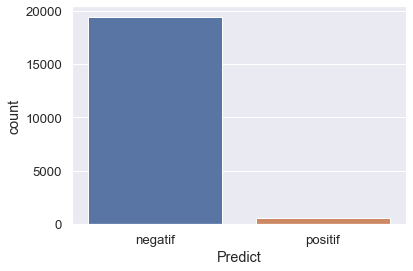

In [92]:
sns.set(style = 'darkgrid', font_scale = 1.2)
sns.countplot(df.Predict)
df['Predict'].value_counts()